<a href="https://colab.research.google.com/github/Francisco2963/Ingenieria_de_caracteres_1/blob/main/Ingenier%C3%ADa_de_Caracter%C3%ADsticas_Creaci%C3%B3n_de_Nuevas_Variables_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [746]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [747]:
df = pd.read_csv('/content/titanic.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [748]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [749]:
df.duplicated().sum()

0

Realiza una limpieza de los datos, manejando los valores nulos. Por ejemplo, puedes imputar los valores faltantes de la edad con la mediana o la media según sea conveniente.

In [750]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# Valores NaN

In [751]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [752]:
df['Cabin'].fillna('Desconocido', inplace=True)

In [753]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [754]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


 Creación de nuevas características:

  – Crea nuevas variables a partir de las existentes. Algunas ideas incluyen:

    – Tamaño de la familia: Combina las variables «SibSp» (número de hermanos/esposos) y «Parch» (número de padres/hijos) para crear una variable que represente el tamaño total de la familia del pasajero.

    – Cabina desconocida: Crea una variable binaria que indique si la cabina de un pasajero es conocida o no, lo cual podría estar relacionado con la clase o la ubicación a bordo.

    – Categoría de tarifa: Agrupa la variable «Fare» en diferentes rangos para crear una variable categórica que represente el nivel de costo del boleto.
    
    – Título del pasajero: Extrae el título de cada pasajero desde la variable «Name» y crea una nueva variable categórica que represente estos títulos (e.g., Mr., Mrs., Miss.).

In [755]:
# Crear la columna booleana "Cabina_desconocida" después de la imputación
df['Cabina_desconocida'] = df['Cabin'].apply(lambda x: 1 if x == 'Desconocido' else 0)

In [756]:
df['Cabina_desconocida'].unique()

array([1, 0])

In [757]:
# Crear la nueva columna "Tamaño_familia" sumando las columnas "SibSp" y "Parch" y agregando 1 para incluir al propio pasajero.
df['Tamaño_familia'] = df['SibSp'] + df['Parch'] + 1


In [758]:
df['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [759]:
df['Fare'].sort_values()

,Fare
271,0.0000
597,0.0000
302,0.0000
633,0.0000
277,0.0000
...,...
438,263.0000
341,263.0000
737,512.3292
258,512.3292


In [760]:
def categorizar_tarifa(fare):
  if fare <= 10:
    return 'Bajo'
  elif 10 < fare <= 30:
    return 'Medio'
  elif 30 < fare <= 50:
    return 'Alto'
  else:
    return 'Muy Alto'

In [761]:
df['Categoría_tarifa'] = df['Fare'].apply(categorizar_tarifa)

In [762]:
print(df[['Fare', 'Categoría_tarifa']].head())

      Fare Categoría_tarifa
0   7.2500             Bajo
1  71.2833         Muy Alto
2   7.9250             Bajo
3  53.1000         Muy Alto
4   8.0500             Bajo


In [763]:
import re

In [764]:
df['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [765]:
# Definir una función para extraer el título
def extraer_titulo(name):
    match = re.search(r'\b(Mrs|Mr|Miss|Ms|Master|Dr|Rev|Col|Major|Mlle|Mme)\b', name)
    if match:
        return match.group(0)
    return 'Desconocido'

# Aplicar la función a la columna 'Name' para crear la nueva columna 'Título'
df['Título'] = df['Name'].apply(extraer_titulo)

# Verifica los resultados
df[['Name', 'Título']].head()

,Name,Título
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [766]:
df['Título'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Desconocido', 'Rev', 'Dr', 'Mme',
       'Ms', 'Major', 'Mlle', 'Col'], dtype=object)

In [767]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         891 non-null    int64  
 1   Survived            891 non-null    int64  
 2   Pclass              891 non-null    int64  
 3   Name                891 non-null    object 
 4   Sex                 891 non-null    object 
 5   Age                 891 non-null    float64
 6   SibSp               891 non-null    int64  
 7   Parch               891 non-null    int64  
 8   Ticket              891 non-null    object 
 9   Fare                891 non-null    float64
 10  Cabin               891 non-null    object 
 11  Embarked            891 non-null    object 
 12  Cabina_desconocida  891 non-null    int64  
 13  Tamaño_familia      891 non-null    int64  
 14  Categoría_tarifa    891 non-null    object 
 15  Título              891 non-null    object 
dtypes: float

In [768]:
def calcular_outliers(df, columna):
  if df[columna].dtype == 'object':
    return None, None, None, None
  else:

   Q1 = df[columna].quantile(0.25)
   Q3 = df[columna].quantile(0.75)
   IQR = Q3 - Q1
   outliers = df[(df[columna] < Q1 - 1.5*IQR) | (df[columna] > Q3 + 1.5*IQR)]
   return outliers, Q1, Q3, IQR

outliers_PassengerId, Q1_PassengerId, Q3_PassengerId, IQR_PassengerId = calcular_outliers(df, 'PassengerId')
outliers_Survived, Q1_Survived, Q3_Survived, IQR_Survived = calcular_outliers(df, 'Survived')
outliers_Pclass, Q1_Pclass, Q3_Pclass, IQR_Pclass = calcular_outliers(df, 'Pclass')
outliers_Age, Q1_Age, Q3_Age, IQR_Age = calcular_outliers(df, 'Age')
outliers_SibSp, Q1_SibSp, Q3_SibSp, IQR_SibSp = calcular_outliers(df, 'SibSp')
outliers_Parch, Q1_Parch, Q3_Parch, IQR_Parch = calcular_outliers(df, 'Parch')
outliers_Fare, Q1_Fare, Q3_Fare, IQR_Fare = calcular_outliers(df, 'Fare')
outliers_Cabina_desconocida, Q1_Cabina_desconocida, Q3_Cabina_desconocida, IQR_Cabina_desconocida = calcular_outliers(df, 'Cabina_desconocida')
outliers_Tamaño_familia, Q1_Tamaño_familia, Q3_Tamaño_familia, IQR_Tamaño_familia = calcular_outliers(df, 'Tamaño_familia')



print(f'Outliers en PassengerId: \n{len(outliers_PassengerId)}')

print(f'Outliers en Survived: \n{len(outliers_Survived)}')

print(f'Outliers en Pclass: \n{len(outliers_Pclass)}')

print(f'Outliers en Age: \n{len(outliers_Age)}')

print(f'Outliers en SibSp: \n{len(outliers_SibSp)}')

print(f'Outliers en Parch: \n{len(outliers_Parch)}')

print(f'Outliers en  Fare: \n{len(outliers_Fare)}')

print(f'Outliers en Cabina desconocida: \n{len(outliers_Cabina_desconocida)}')

print(f'Outliers en Tamaño_familia: \n{len(outliers_Tamaño_familia)}')



Outliers en PassengerId: 
0
Outliers en Survived: 
0
Outliers en Pclass: 
0
Outliers en Age: 
66
Outliers en SibSp: 
46
Outliers en Parch: 
213
Outliers en  Fare: 
116
Outliers en Cabina desconocida: 
204
Outliers en Tamaño_familia: 
91


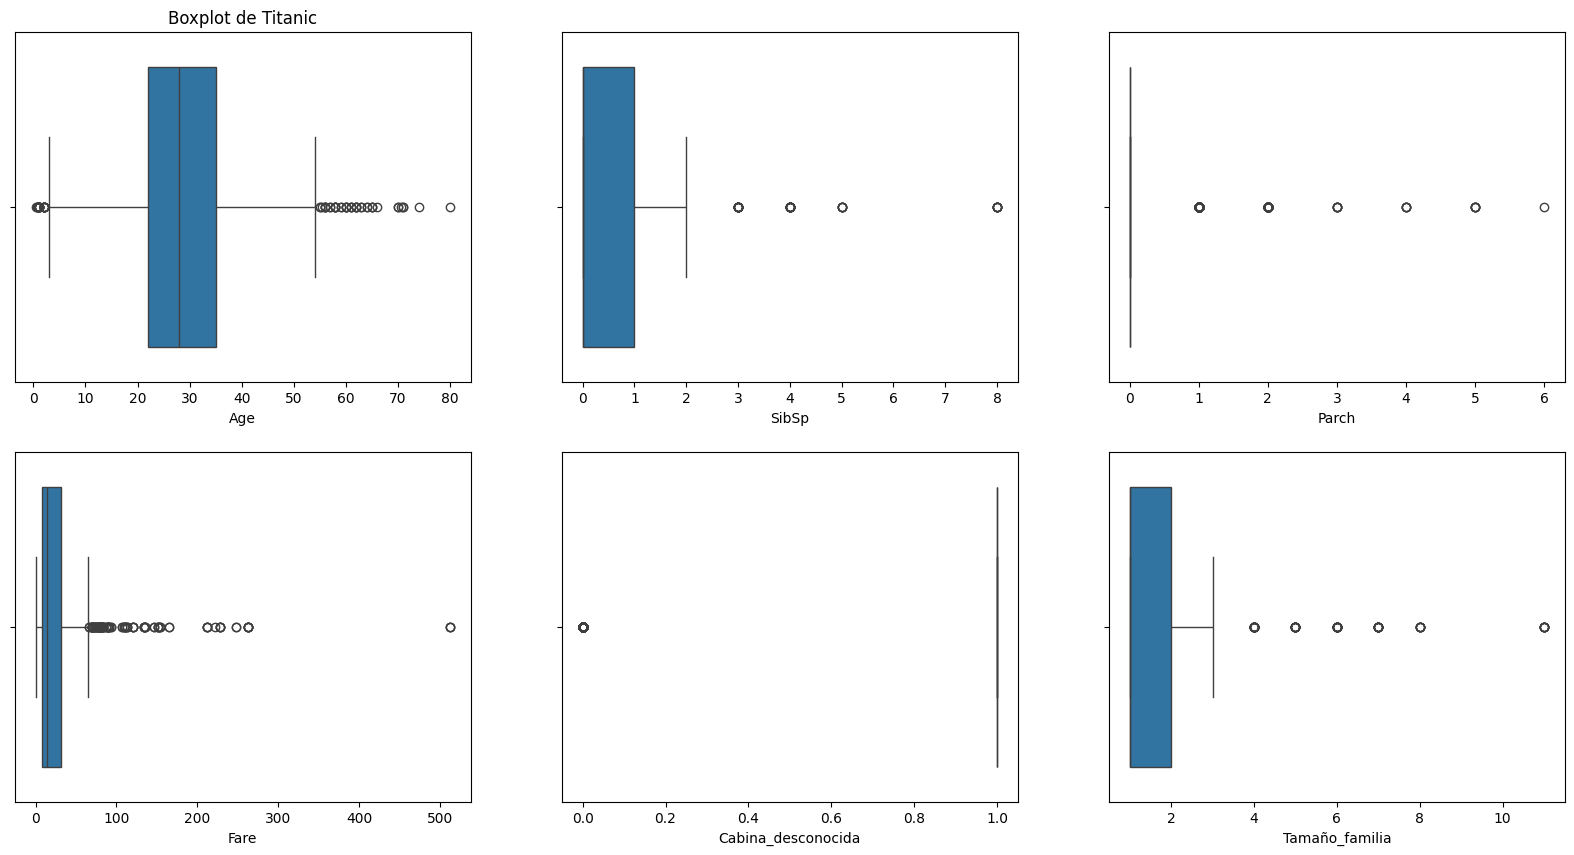

In [769]:
plt.figure(figsize=(20,10))

plt.subplot(2, 3, 1)
sns.boxplot(x=df['Age'])
plt.title('Boxplot de Titanic')
plt.xlabel('Age')

plt.subplot(2,3,2)
sns.boxplot(x=df['SibSp'])
plt.xlabel('SibSp')

plt.subplot(2,3,3)
sns.boxplot(x=df['Parch'])
plt.xlabel('Parch')

plt.subplot(2,3,4)
sns.boxplot(x=df['Fare'])
plt.xlabel('Fare')

plt.subplot(2,3,5)
sns.boxplot(x=df['Cabina_desconocida'])
plt.xlabel('Cabina_desconocida')

plt.subplot(2,3,6)
sns.boxplot(x=df['Tamaño_familia'])


plt.show()

In [770]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabina_desconocida,Tamaño_familia,Categoría_tarifa,Título
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Desconocido,S,1,2,Bajo,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,2,Muy Alto,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Desconocido,S,1,1,Bajo,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2,Muy Alto,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Desconocido,S,1,1,Bajo,Mr


In [771]:
correlation_matrix = df[["PassengerId","Survived","Pclass","Age","SibSp","Parch","Fare",
                         "Cabina_desconocida","Tamaño_familia"]].corr(method='pearson')

print('\nCorrelación de Pearson: ')
print(correlation_matrix)


Correlación de Pearson: 
                    PassengerId  Survived    Pclass       Age     SibSp  \
PassengerId            1.000000 -0.005007 -0.035144  0.034212 -0.057527   
Survived              -0.005007  1.000000 -0.338481 -0.064910 -0.035322   
Pclass                -0.035144 -0.338481  1.000000 -0.339898  0.083081   
Age                    0.034212 -0.064910 -0.339898  1.000000 -0.233296   
SibSp                 -0.057527 -0.035322  0.083081 -0.233296  1.000000   
Parch                 -0.001652  0.081629  0.018443 -0.172482  0.414838   
Fare                   0.012658  0.257307 -0.549500  0.096688  0.159651   
Cabina_desconocida    -0.019919 -0.316912  0.725541 -0.240314  0.040460   
Tamaño_familia        -0.040143  0.016639  0.065997 -0.245619  0.890712   

                       Parch      Fare  Cabina_desconocida  Tamaño_familia  
PassengerId        -0.001652  0.012658           -0.019919       -0.040143  
Survived            0.081629  0.257307           -0.316912        0.0

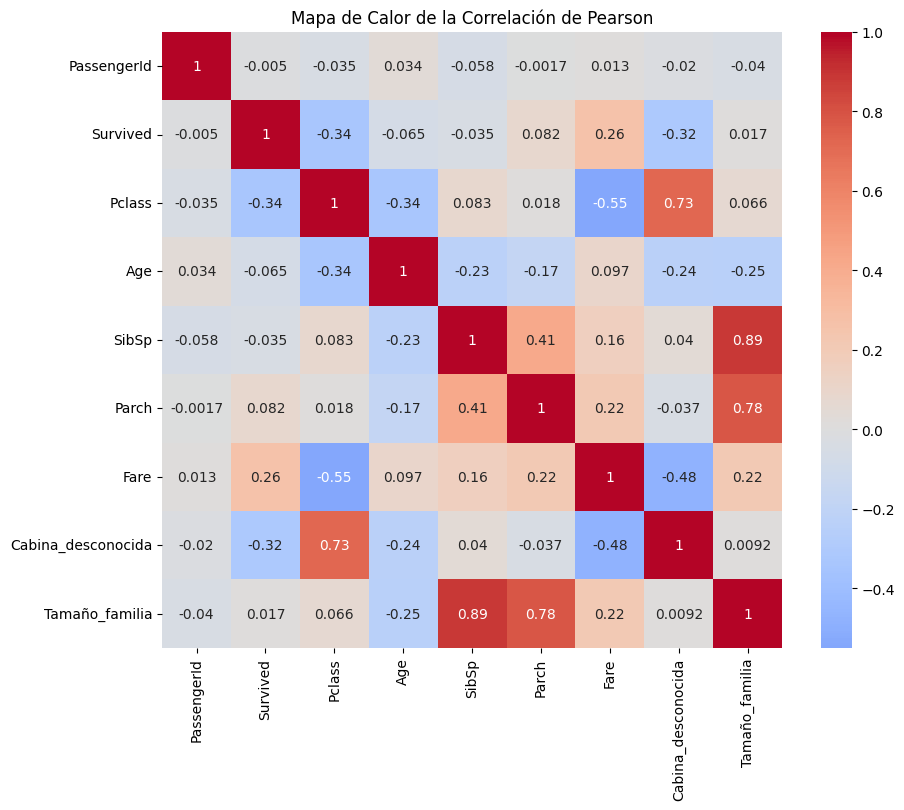

In [772]:
# Crear mapas de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de la Correlación de Pearson")
plt.show()

# PREPROCESAMIENTO

In [773]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         891 non-null    int64  
 1   Survived            891 non-null    int64  
 2   Pclass              891 non-null    int64  
 3   Name                891 non-null    object 
 4   Sex                 891 non-null    object 
 5   Age                 891 non-null    float64
 6   SibSp               891 non-null    int64  
 7   Parch               891 non-null    int64  
 8   Ticket              891 non-null    object 
 9   Fare                891 non-null    float64
 10  Cabin               891 non-null    object 
 11  Embarked            891 non-null    object 
 12  Cabina_desconocida  891 non-null    int64  
 13  Tamaño_familia      891 non-null    int64  
 14  Categoría_tarifa    891 non-null    object 
 15  Título              891 non-null    object 
dtypes: float

In [774]:
columna_a_eliminar = ['Cabina_desconocida', 'Tamaño_familia', 'Categoría_tarifa','Título']
df_1 = df.drop(columna_a_eliminar, axis=1)

In [775]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [776]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         891 non-null    int64  
 1   Survived            891 non-null    int64  
 2   Pclass              891 non-null    int64  
 3   Name                891 non-null    object 
 4   Sex                 891 non-null    object 
 5   Age                 891 non-null    float64
 6   SibSp               891 non-null    int64  
 7   Parch               891 non-null    int64  
 8   Ticket              891 non-null    object 
 9   Fare                891 non-null    float64
 10  Cabin               891 non-null    object 
 11  Embarked            891 non-null    object 
 12  Cabina_desconocida  891 non-null    int64  
 13  Tamaño_familia      891 non-null    int64  
 14  Categoría_tarifa    891 non-null    object 
 15  Título              891 non-null    object 
dtypes: float

In [777]:
!pip install dask[dataframe]

In [778]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

In [779]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [780]:
y = df_1['Survived']
X_original = df_1.drop('Survived', axis = 'columns')

In [781]:
X_original.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Desconocido,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Desconocido,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Desconocido,S


In [782]:
y.unique()

array([0, 1])

In [783]:
label = LabelEncoder()
y = label.fit_transform(y)

In [784]:
# Verificar los valores únicos depsues de escalar en y (varible objetivo)
valores_unicos = np.unique(y)
print(valores_unicos)

[0 1]


In [785]:
# Dividimos los datos en conjunto de entrenamiemto y prueba
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X_original, y, test_size=0.3, random_state=42, stratify=y)


In [786]:
# Columnas numéricas y categóricas
variables_num = X_train_orig.select_dtypes(include=['float64', 'int64']).columns.tolist()
variables_cat = ["Name", "Sex", "Ticket", "Cabin", "Embarked"]

# Pipeline para preprocesamiento numérico
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

# Pipeline para preprocesamiento categórico
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# ColumnTransformer que incluye las transformaciones numéricas y categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, variables_num),
        ("cat", cat_transformer, variables_cat)
    ],
    remainder="passthrough",
    n_jobs=-1,
    verbose=True,
    sparse_threshold=0.3
)

In [787]:
pipeline_LR = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(penalty='l2', C=1.0, solver='lbfgs',
                                 max_iter=100, tol=1e-4, random_state=42))
])

In [788]:
# Entrenar el modelo
pipeline_LR.fit(X_train_orig, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['PassengerId', 'Pclass',
                                                   'Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Name', 'Sex', 'Ticket',
                                                   'Cabin', 'Embarked'])],
                                   verbose=True)),
                ('model', LogisticRegression(random_state=42))])

In [789]:
# Realizar Predicciones
y_pred_LR = pipeline_LR.predict(X_test_orig)


# MODELO LR sin las nuevas caracteristicas

In [790]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [791]:
# Realizar predicciones en el conjunto de prueba
y_pred_LR = pipeline_LR.predict(X_test_orig)
y_prob_LR = pipeline_LR.predict_proba(X_test_orig)[:, 1]  # Probabilidades de la clase positiva

Exactitud: 0.7985074626865671
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       165
           1       0.73      0.76      0.74       103

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



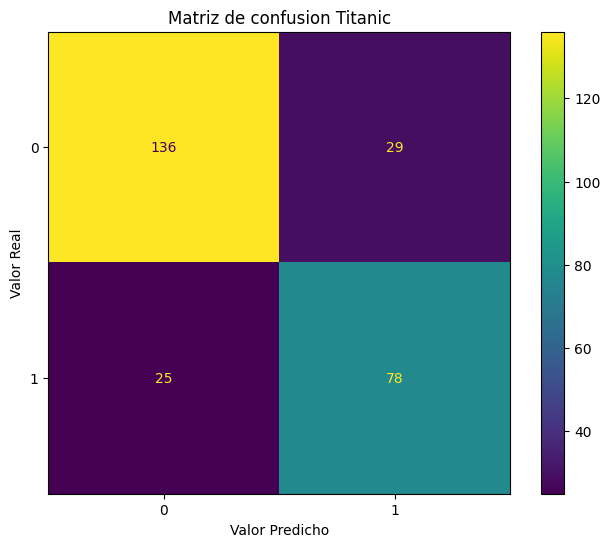

In [792]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred_LR)
print(f'Exactitud: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred_LR))

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred_LR)
fig, ax=plt.subplots(figsize=(8,6))
cm2 = ConfusionMatrixDisplay(conf_matrix)
cm2.plot(ax=ax)
plt.title('Matriz de confusion Titanic')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.show()

# Modelo con las nuevas caractaristicas

In [793]:
!pip install --upgrade scikit-learn

In [794]:
import numpy as np
import pandas as pd

In [795]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel

In [796]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         891 non-null    int64  
 1   Survived            891 non-null    int64  
 2   Pclass              891 non-null    int64  
 3   Name                891 non-null    object 
 4   Sex                 891 non-null    object 
 5   Age                 891 non-null    float64
 6   SibSp               891 non-null    int64  
 7   Parch               891 non-null    int64  
 8   Ticket              891 non-null    object 
 9   Fare                891 non-null    float64
 10  Cabin               891 non-null    object 
 11  Embarked            891 non-null    object 
 12  Cabina_desconocida  891 non-null    int64  
 13  Tamaño_familia      891 non-null    int64  
 14  Categoría_tarifa    891 non-null    object 
 15  Título              891 non-null    object 
dtypes: float

In [797]:
y = df['Survived']
X = df.drop('Survived', axis = 'columns')

In [798]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabina_desconocida,Tamaño_familia,Categoría_tarifa,Título
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Desconocido,S,1,2,Bajo,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,2,Muy Alto,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Desconocido,S,1,1,Bajo,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2,Muy Alto,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Desconocido,S,1,1,Bajo,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Desconocido,S,1,1,Medio,Rev
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,1,Medio,Miss
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,Desconocido,S,1,4,Medio,Miss
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1,Medio,Mr


In [799]:
label = LabelEncoder()
y = label.fit_transform(y)

In [800]:
# Dividir los datos en conjunto de entrenamiento y prueba después del preprocesador
#X_processed = preprocessor.fit_transform(X)  # Procesar X antes de dividir
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [801]:
# Columnas numéricas y categóricas
variables_num = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
variables_cat = ["Name", "Sex", "Ticket", "Cabin", "Embarked","Categoría_tarifa","Título"]

# Pipeline para preprocesamiento numérico
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

# Pipeline para preprocesamiento categórico
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# ColumnTransformer que incluye las transformaciones numéricas y categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, variables_num),
        ("cat", cat_transformer, variables_cat)
    ],
    remainder="passthrough",
    n_jobs=-1,
    verbose=True,
    sparse_threshold=0.3
)

In [802]:
# Pipeline de preprocesamiento y modelo de Regresión Logística (antes de la ingeniería de características)
pipeline_LR = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=100, tol=1e-4, random_state=42))
])


In [803]:
# Ajuste del pipeline antes de la ingeniería de características
pipeline_LR.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['PassengerId', 'Pclass',
                                                   'Age', 'SibSp', 'Parch',
                                                   'Fare', 'Cabina_desconocida',
                                                   'Tamaño_familia']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Name', 'Sex', 'Ticket',
                                                   'Cabin', 'Embarked',
                                                   'Categoría_tarifa',
                                                   'Título'])],
                                   verbose=True)),
                ('model', LogisticRegression(random_state=42))])

In [804]:
# Crear características polinómicas a partir de las características procesadas
X_train_processed = pipeline_LR.named_steps['preprocessor'].transform(X_train)
X_test_processed = pipeline_LR.named_steps['preprocessor'].transform(X_test)

In [805]:
# Crear características polinómicas
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_processed)
X_test_poly = poly.transform(X_test_processed)

COMENTARIO

SelectFromModel es un Metatransformador para seleccionar características basadas en pesos de importancia.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html

https://qu4nt.github.io/sklearn-doc-es/modules/feature_selection.html

In [806]:
# Selección de características usando SelectFromModel con LogisticRegression
selector = SelectFromModel(estimator=LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=200, random_state=42))
selector.fit(X_train_poly, y_train)


SelectFromModel(estimator=LogisticRegression(max_iter=200, random_state=42))

In [814]:
selected_features = selector.get_support()
selected_features

array([ True,  True,  True, ...,  True, False,  True])

In [807]:
# Aplicar el selector para reducir las características
X_train_selected = selector.transform(X_train_poly)
X_test_selected = selector.transform(X_test_poly)

# Modelo con todas las caracteristicas (sin ingenieria de caracteristicas)

In [808]:
# --- Evaluación del modelo original (sin ingeniería de características) ---
# Hacer predicciones en el conjunto de prueba usando el pipeline original
y_pred_LR = pipeline_LR.predict(X_test)

Exactitud del modelo original: 0.8246
Informe de Clasificación del modelo original:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       165
           1       0.75      0.81      0.78       103

    accuracy                           0.82       268
   macro avg       0.81      0.82      0.82       268
weighted avg       0.83      0.82      0.83       268



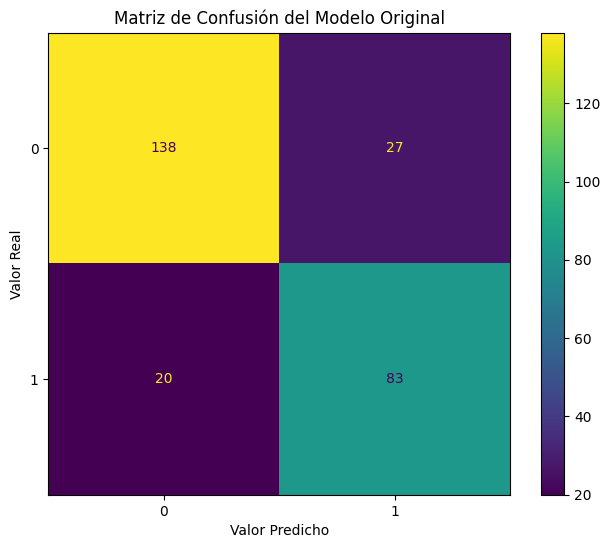

In [809]:
# Evaluar el modelo original
accuracy = accuracy_score(y_test, y_pred_LR)
print(f'Exactitud del modelo original: {accuracy:.4f}')
print('Informe de Clasificación del modelo original:')
print(classification_report(y_test, y_pred_LR))

# Matriz de Confusión del modelo original
conf_matrix = confusion_matrix(y_test, y_pred_LR)
fig, ax = plt.subplots(figsize=(8, 6))
cm2 = ConfusionMatrixDisplay(conf_matrix)
cm2.plot(ax=ax)
plt.title('Matriz de Confusión del Modelo Original')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.show()

# Modelo con las caracteristicas seleccionadas

In [810]:
# --- Entrenamiento y Evaluación del modelo con características seleccionadas ---
# Entrenar un modelo con las características seleccionadas
model_selected = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=200, random_state=42)
model_selected.fit(X_train_selected, y_train)

LogisticRegression(max_iter=200, random_state=42)

In [811]:
# Hacer predicciones en el conjunto de prueba con las características seleccionadas
y_pred_selected = model_selected.predict(X_test_selected)

Exactitud del modelo con características seleccionadas: 0.8060
Informe de Clasificación del modelo con características seleccionadas:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       165
           1       0.76      0.72      0.74       103

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.81      0.80       268



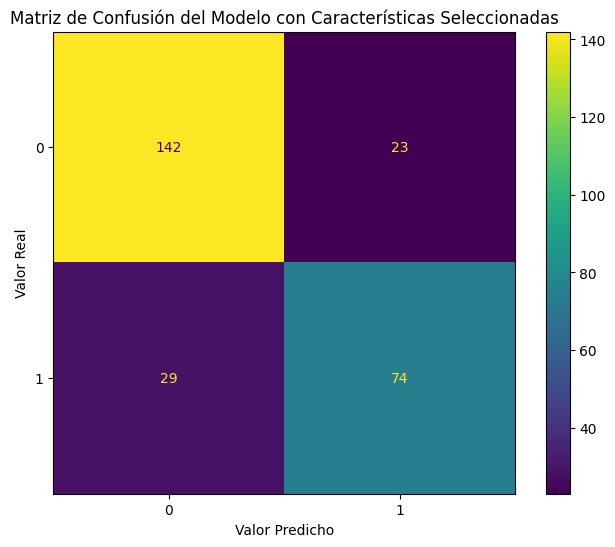

In [812]:
# Evaluar el modelo con características seleccionadas
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print(f'Exactitud del modelo con características seleccionadas: {accuracy_selected:.4f}')
print('Informe de Clasificación del modelo con características seleccionadas:')
print(classification_report(y_test, y_pred_selected))

# Matriz de Confusión del modelo con características seleccionadas
conf_matrix_selected = confusion_matrix(y_test, y_pred_selected)
fig, ax = plt.subplots(figsize=(8, 6))
cm2_selected = ConfusionMatrixDisplay(conf_matrix_selected)
cm2_selected.plot(ax=ax)
plt.title('Matriz de Confusión del Modelo con Características Seleccionadas')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.show()

COMENTARIO FINAL

Comparación y Conclusiones

Exactitud:

El modelo original tiene una mejor exactitud (82.46%) en comparación con el modelo con características seleccionadas (80.60%).

Precisión y Exhaustividad:

El modelo original tiene mejores métricas de precisión y exhaustividad para ambas clases, lo que sugiere que está identificando correctamente tanto las instancias de clase 0 como las de clase 1 en mayor medida.

F1-Score:

El F1-Score del modelo original es superior, especialmente en la clase 1, lo que indica que está logrando un mejor equilibrio entre precisión y exhaustividad.

Matriz de Confusión:

El modelo original tiene menos falsos negativos y falsos positivos en comparación con el modelo con características seleccionadas, lo que indica que está tomando decisiones más precisas en sus predicciones.

Conclusión

El modelo original parece ser más efectivo para predecir las clases en este caso, incluso con menos características. Esto sugiere que la eliminación de algunas características puede no haber mejorado la capacidad predictiva del modelo, sin embargo, ambos modelos son mejores que el modelo con las columnas originales, este modelo obtuvo una precision de 79% un poco mas bajo que los modelos entrenados con las nuevas caractaristicas.